In [1]:
import json
import time

import numpy as np
import pandas as pd

from bs4 import BeautifulSoup

from pydantic import BaseModel
from typing import List, Optional

from selenium import webdriver

from supabase import create_client, Client

import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch
import seaborn as sns

In [3]:
driver = webdriver.Chrome()

In [5]:
whoscored_url = 'https://1xbet.whoscored.com/matches/1866136/live/europe-champions-league-2024-2025-benfica-barcelona'

In [7]:
driver.get(whoscored_url)

In [9]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [11]:
element = soup.select_one('script:-soup-contains("matchCentreData")')

In [13]:
matchdict = json.loads(element.text.split("matchCentreData: ")[1].split(',\n')[0])

In [15]:
match_events = matchdict['events']

In [17]:
df = pd.DataFrame(match_events)

In [19]:
df.dropna(subset='playerId', inplace=True)

In [21]:
df = df.where(pd.notnull(df), None)

In [23]:
df = df.rename(
    {
        'eventId': 'event_id',
        'expandedMinute': 'expanded_minute',
        'outcomeType': 'outcome_type',
        'isTouch': 'is_touch',
        'playerId': 'player_id',
        'teamId': 'team_id',
        'endX': 'end_x',
        'endY': 'end_y',
        'blockedX': 'blocked_x',
        'blockedY': 'blocked_y',
        'goalMouthZ': 'goal_mouth_z',
        'goalMouthY': 'goal_mouth_y',
        'isShot': 'is_shot',
        'cardType': 'card_type',
        'isGoal': 'is_goal'
    },
    axis=1
)

In [25]:
df['period_display_name'] = df['period'].apply(lambda x: x['displayName'])
df['type_display_name'] = df['type'].apply(lambda x: x['displayName'])
df['outcome_type_display_name'] = df['outcome_type'].apply(lambda x: x['displayName'])

In [27]:
df.drop(columns=["period", "type", "outcome_type"], inplace=True)

In [29]:
if 'is_goal' not in df.columns:
    print('missing goals')
    df['is_goal'] = False

In [33]:
pd.set_option('display.max_columns', None)

In [35]:
df.head()

,id,event_id,minute,second,team_id,x,y,expanded_minute,qualifiers,satisfiedEventsTypes,is_touch,player_id,end_x,end_y,relatedEventId,relatedPlayerId,blocked_x,blocked_y,goal_mouth_z,goal_mouth_y,is_shot,is_goal,card_type,isOwnGoal,period_display_name,type_display_name,outcome_type_display_name
2,2.767664e+09,3,0,0.0,65,50.0,50.0,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 37, 216, 218]",True,300447.0,42.2,53.3,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,FirstHalf,Pass,Successful
3,2.767664e+09,4,0,2.0,65,42.1,52.4,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 38, 215, 218]",True,454343.0,31.5,37.9,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,FirstHalf,Pass,Successful
4,2.767664e+09,5,0,3.0,65,31.6,39.5,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 36, 37, 216, 218]",True,384711.0,35.1,65.7,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,FirstHalf,Pass,Successful
5,2.767664e+09,6,0,5.0,65,35.9,68.4,0,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 117, 30, 36, 37, 216, 218]",True,498386.0,40.1,91.8,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,FirstHalf,Pass,Successful
6,2.767664e+09,7,0,7.0,65,39.8,91.4,0,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 35, 38, 215, 218]",True,422938.0,29.6,82.4,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,FirstHalf,Pass,Successful


In [37]:
selected = df[['minute','second', 'player_id', 'type_display_name', 'outcome_type_display_name', 'x', 'y', 'end_x', 'end_y']]

In [109]:
filtered = selected[selected['player_id'] == 402197]

In [111]:
pd.set_option('display.max_rows', None)

In [113]:
filtered

,minute,second,player_id,type_display_name,outcome_type_display_name,x,y,end_x,end_y
10,0,15.0,402197.0,BallTouch,Unsuccessful,57.2,97.7,NaN,NaN
28,0,57.0,402197.0,Pass,Successful,19.2,78.1,32.6,79.0
52,3,50.0,402197.0,Pass,Unsuccessful,55.2,37.9,65.6,81.1
80,4,58.0,402197.0,BlockedPass,Successful,73.2,7.3,NaN,NaN
88,5,17.0,402197.0,Pass,Successful,54.0,74.8,61.5,95.7
105,6,24.0,402197.0,Pass,Successful,28.0,8.3,24.1,3.2
118,6,46.0,402197.0,Pass,Successful,39.3,80.6,30.3,79.0
131,7,22.0,402197.0,Pass,Unsuccessful,55.2,21.6,53.5,21.3
133,7,24.0,402197.0,Pass,Successful,51.1,18.2,40.7,32.1
136,7,33.0,402197.0,Pass,Successful,63.1,19.4,72.0,6.5


In [115]:
final = filtered[filtered['type_display_name'] == 'Pass']

In [117]:
key_passes = pd.read_csv('Pedri vs Benfica.csv')

In [119]:
key_passes

,Player,X,Y,END_X,END_Y
0,Pedri,74.8,33.9,88.8,37.9
1,Pedri,75.2,67.2,90.6,49.3
2,Pedri,61.1,65.1,68.7,54.2
3,Pedri,71.6,56.7,75.5,24.4
4,Pedri,78.0,30.3,91.5,34.9
5,Pedri,84.6,74.5,94.5,48.1


In [121]:
touches = filtered[filtered['type_display_name'] == 'BallTouch']
recovery = filtered[filtered['type_display_name'] == 'BallRecovery']
dribble = filtered[filtered['type_display_name'] == 'TakeOn']
goal = filtered[filtered['type_display_name'] == 'Goal']
missed = filtered[filtered['type_display_name'] == 'MissedShots']
saved = filtered[filtered['type_display_name'] == 'SavedShot']
foul = filtered[filtered['type_display_name'] == 'Foul']
tackle = filtered[filtered['type_display_name'] == 'Tackle']
challenge = filtered[filtered['type_display_name'] == 'Challenge']

In [123]:
succ_dribble = dribble[dribble['outcome_type_display_name'] == 'Successful']

In [125]:
final['x'] = final['x']*1.2
final['end_x'] = final['end_x']*1.2

final['y'] = final['y']*0.8
final['end_y'] = final['end_y']*0.8

key_passes['X'] = key_passes['X']*1.2
key_passes['END_X'] = key_passes['END_X']*1.2

key_passes['Y'] = key_passes['Y']*0.8
key_passes['END_Y'] = key_passes['END_Y']*0.8

touches['x'] = touches['x']*1.2
touches['y'] = touches['y']*0.8

recovery['x'] = recovery['x']*1.2
recovery['y'] = recovery['y']*0.8

succ_dribble['x'] = succ_dribble['x']*1.2
succ_dribble['y'] = succ_dribble['y']*0.8

goal['x'] = goal['x']*1.2
goal['y'] = goal['y']*0.8

missed['x'] = missed['x']*1.2
missed['y'] = missed['y']*0.8

saved['x'] = saved['x']*1.2
saved['y'] = saved['y']*0.8

foul['x'] = foul['x']*1.2
foul['y'] = foul['y']*0.8

tackle['x'] = tackle['x']*1.2
tackle['y'] = tackle['y']*0.8

challenge['x'] = challenge['x']*1.2
challenge['y'] = challenge['y']*0.8

C:\Users\risha\AppData\Local\Temp\ipykernel_10584\3086243727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['x'] = final['x']*1.2
C:\Users\risha\AppData\Local\Temp\ipykernel_10584\3086243727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['end_x'] = final['end_x']*1.2
C:\Users\risha\AppData\Local\Temp\ipykernel_10584\3086243727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [127]:
final

,minute,second,player_id,type_display_name,outcome_type_display_name,x,y,end_x,end_y
28,0,57.0,402197.0,Pass,Successful,23.04,62.48,39.12,63.20
52,3,50.0,402197.0,Pass,Unsuccessful,66.24,30.32,78.72,64.88
88,5,17.0,402197.0,Pass,Successful,64.80,59.84,73.80,76.56
105,6,24.0,402197.0,Pass,Successful,33.60,6.64,28.92,2.56
118,6,46.0,402197.0,Pass,Successful,47.16,64.48,36.36,63.20
131,7,22.0,402197.0,Pass,Unsuccessful,66.24,17.28,64.20,17.04
133,7,24.0,402197.0,Pass,Successful,61.32,14.56,48.84,25.68
136,7,33.0,402197.0,Pass,Successful,75.72,15.52,86.40,5.20
138,7,36.0,402197.0,Pass,Successful,76.68,5.92,77.16,13.12
154,8,20.0,402197.0,Pass,Successful,89.76,27.12,106.56,30.32


In [129]:
final_successful = final[final['outcome_type_display_name'] == 'Successful']

In [131]:
final_unsuccessful = final[final['outcome_type_display_name'] == 'Unsuccessful']

C:\Users\risha\anaconda3\lib\site-packages\mplsoccer\_pitch_plot.py:167: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


Text(104.5, 81.8, 'Foul Won')

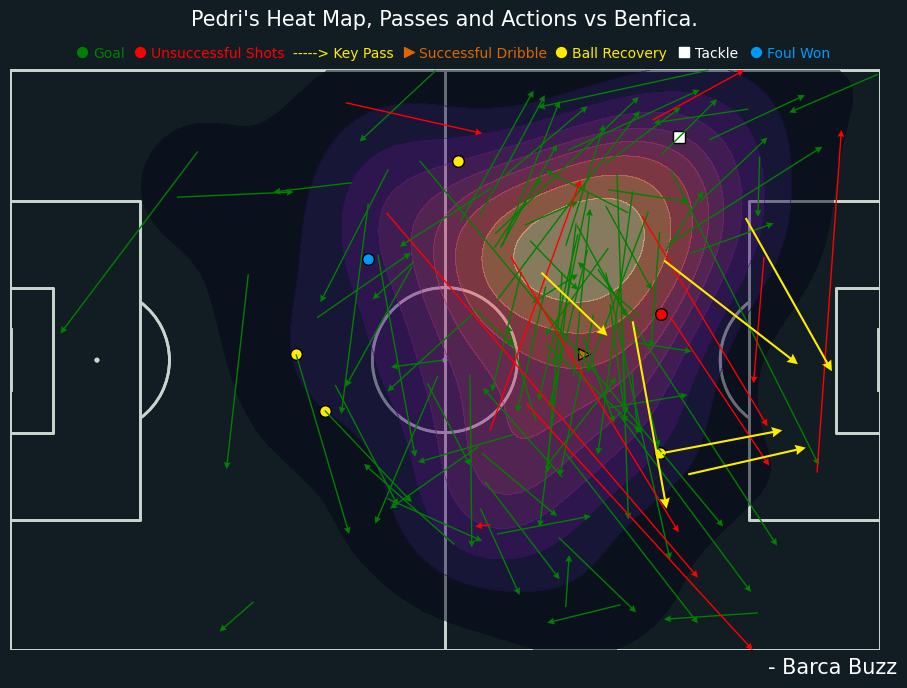

In [177]:
pitch = Pitch(pitch_type='statsbomb',
                      pitch_color='#111d23', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13.5,8), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#111d23')

pitch.draw(ax=ax)
#plt.gca().invert_yaxis()

kde = pitch.kdeplot(
                  final.x,final.y,ax = ax,
                  shade = True,
                  shade_lowest = False,
                  alpha = .5,
                  n_levels = 10,
                  cmap = 'magma')

#plt.scatter(final['x'], final['y'], s = 50, c = 'w')
#plt.scatter(touches['x'], touches['y'], s = 50, c = 'w')
plt.scatter(recovery['x'], recovery['y'], s= 70, c = '#ffea00', edgecolor = '#000000')
plt.scatter(succ_dribble['x'], succ_dribble['y'], s= 70, c = '#dc6601', marker = '>', edgecolor = '#000000')
plt.scatter(goal['x'], goal['y'], s= 70, c = 'g', hatch = '////')
plt.scatter(missed['x'], missed['y'], s= 70, c = 'r', edgecolor = '#000000')
plt.scatter(saved['x'], saved['y'], s= 70, c = 'r', edgecolor = '#000000')
plt.scatter(foul['x'], foul['y'], s= 70, c = '#009afd', edgecolor = '#000000')
plt.scatter(tackle['x'], tackle['y'], s= 70,c = 'w', marker = ',', edgecolor = '#000000')
#plt.scatter(challenge['x'], challenge['y'], s= 70,c = 'w', marker = ',')

pitch.arrows(final_successful.x, final_successful.y, final_successful.end_x, final_successful.end_y, width=1,
             headwidth=5, headlength=5, color='green', ax=ax, label='Completed Passes')

pitch.arrows(final_unsuccessful.x, final_unsuccessful.y, final_unsuccessful.end_x, final_unsuccessful.end_y, width=1,
             headwidth=5, headlength=5, color='red', ax=ax, label='Incomplete Passes')

pitch.arrows(key_passes.X, key_passes.Y, key_passes.END_X, key_passes.END_Y, width=1.5,
             headwidth=5, headlength=5, color='#ffea00', ax=ax, label='Key Passes', linestyle = '----')

endnote = "- Barca Buzz"
plt.figtext(0.8, 0.1, endnote, ha="center", va="top", fontsize=15, color="white")

plt.xlim(0,120)
plt.ylim(0,85)

plt.title("Pedri's Heat Map, Passes and Actions vs Benfica.", c='w', fontsize=15)

plt.scatter(x = 10, y = 82.5, s = 50, c = 'g')
plt.text(x = 11.5, y = 81.8, s = f'Goal', c = 'g', fontsize = 10)

plt.scatter(x = 18, y = 82.5, s = 50, c = 'r')
plt.text(x = 19.5, y = 81.8, s = f'Unsuccessful Shots', c = 'r', fontsize = 10)

plt.text(x = 39, y = 81.8, s = f'-----> Key Pass', c = '#ffea00', fontsize = 10)

plt.scatter(x = 55, y = 82.5, s = 50, c = '#dc6601', marker = '>')
plt.text(x = 56.5, y = 81.8, s = f'Successful Dribble', c = '#dc6601', fontsize = 10)

plt.scatter(x = 76, y = 82.5, s = 50, c = '#ffea00')
plt.text(x = 77.5, y = 81.8, s = f'Ball Recovery', c = '#ffea00', fontsize = 10)

plt.scatter(x = 93, y = 82.5, s = 50, c = 'w', marker = ',')
plt.text(x = 94.5, y = 81.8, s = f'Tackle', c = 'w', fontsize = 10)

plt.scatter(x = 103, y = 82.5, s = 50, c = '#009afd')
plt.text(x = 104.5, y = 81.8, s = f'Foul Won', c = '#009afd', fontsize = 10)

C:\Users\risha\anaconda3\lib\site-packages\mplsoccer\_pitch_plot.py:167: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


Text(0.5, 1.0, "Pedri's Heat Map and Passes vs Stade Brestois")

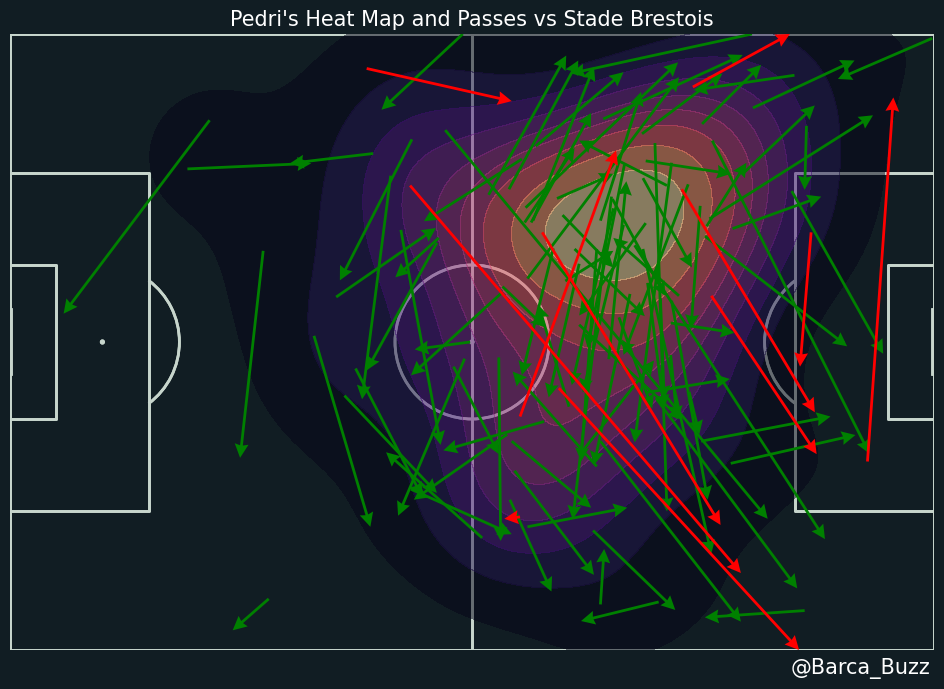

In [106]:
pitch = Pitch(pitch_type='statsbomb',
                      pitch_color='#111d23', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13.5,8), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#111d23')

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

kde = pitch.kdeplot(
                  final.x,final.y,ax = ax,
                  shade = True,
                  shade_lowest = False,
                  alpha = .5,
                  n_levels = 10,
                  cmap = 'magma')

pitch.arrows(final_successful.x, final_successful.y, final_successful.end_x, final_successful.end_y, width=2,
             headwidth=5, headlength=5, color='green', ax=ax, label='Completed Passes')

pitch.arrows(final_unsuccessful.x, final_unsuccessful.y, final_unsuccessful.end_x, final_unsuccessful.end_y, width=2,
             headwidth=5, headlength=5, color='red', ax=ax, label='Completed Passes')

endnote = "@Barca_Buzz"
plt.figtext(0.8, 0.1, endnote, ha="center", va="top", fontsize=15, color="white")

plt.xlim(0,120)
plt.ylim(0,80)

plt.title("Pedri's Heat Map and Passes vs Stade Brestois", c='w', fontsize=15)